# Summary:
(1) No missing values

(2) Duplicates are found - did not remove, read below.

(3) Log transformation on Outliers.

(4) Scaling data using StandardScaler.

(5) Dropping a column that had no significant information.

(6) I had basic EDAs from before, so I kept them - might be helpful for the EDA team.

In [451]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [453]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
  
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 
  
# metadata 
#print(rt_iot2022.metadata.additional_info) 
  
# variable information 
print(rt_iot2022.variables) 


                    name     role         type demographic description units  \
0              id.orig_p  Feature      Integer        None        None  None   
1              id.resp_p  Feature      Integer        None        None  None   
2                  proto  Feature  Categorical        None        None  None   
3                service  Feature   Continuous        None        None  None   
4          flow_duration  Feature   Continuous        None        None  None   
..                   ...      ...          ...         ...         ...   ...   
80  fwd_init_window_size  Feature      Integer        None        None  None   
81  bwd_init_window_size  Feature      Integer        None        None  None   
82  fwd_last_window_size  Feature      Integer        None        None  None   
83           Attack_type   Target  Categorical        None        None  None   
84                    id       ID      Integer        None        None  None   

   missing_values  
0              no  

In [454]:
X

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt      32.011598             9   
1           51143       1883   tcp    mqtt      31.883584             9   
2           44761       1883   tcp    mqtt      32.124053             9   
3           60893       1883   tcp    mqtt      31.961063             9   
4           51087       1883   tcp    mqtt      31.902362             9   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006             1   
123113      59247      64623   tcp       -       0.000007             1   
123114      59247      64680   tcp       -       0.000006             1   
123115      59247      65000   tcp       -       0.000006             1   
123116      59247      65129   tcp       -       0.000006             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                  5                  3                  3          0.281148   
1                  5                  3                  3          0.282277   
2                  5                  3                  3          0.280164   
3                  5                  3                  3          0.281593   
4                  5                  3                  3          0.282111   
...              ...                ...                ...               ...   
123112             1                  0                  0     167772.160000   
123113             1                  0                  0     144631.172400   
123114             1                  0                  0     167772.160000   
123115             1                  0                  0     167772.160000   
123116             1                  0                  0     167772.160000   

        ...    active.avg  active.std     idle.min     idle.max     idle.tot  \
0       ...  2.282415e+06         0.0  29729182.96  29729182.96  29729182.96   
1       ...  2.028307e+06         0.0  29855277.06  29855277.06  29855277.06   
2       ...  2.281904e+06         0.0  29842149.02  29842149.02  29842149.02   
3       ...  2.047288e+06         0.0  29913774.97  29913774.97  29913774.97   
4       ...  2.087657e+06         0.0  29814704.90  29814704.90  29814704.90   
...     ...           ...         ...          ...          ...          ...   
123112  ...  5.960464e+00         0.0         0.00         0.00         0.00   
123113  ...  6.914139e+00         0.0         0.00         0.00         0.00   
123114  ...  5.960464e+00         0.0         0.00         0.00         0.00   
123115  ...  5.960464e+00         0.0         0.00         0.00         0.00   
123116  ...  5.960464e+00         0.0         0.00         0.00         0.00   

           idle.avg  idle.std  fwd_init_window_size  bwd_init_window_size  \
0       29729182.96       0.0                 64240                 26847   
1       29855277.06       0.0                 64240                 26847   
2       29842149.02       0.0                 64240                 26847   
3       29913774.97       0.0                 64240                 26847   
4       29814704.90       0.0                 64240                 26847   
...             ...       ...                   ...                   ...   
123112         0.00       0.0                  1024                     0   
123113         0.00       0.0                  1024                     0   
123114         0.00       0.0                  1024                     0   
123115         0.00       0.0                  1024                     0   
123116         0.00       0.0                  1024                     0   

        fwd_last_window_size  
0                        502  
1                        502  
2                        502  
3                        502  
4                        502  
...                      ...  
123112                  1024  
123113      

### Checking Columns

In [456]:
rt_iot2022.variables 

name     role         type demographic description units  \
0              id.orig_p  Feature      Integer        None        None  None   
1              id.resp_p  Feature      Integer        None        None  None   
2                  proto  Feature  Categorical        None        None  None   
3                service  Feature   Continuous        None        None  None   
4          flow_duration  Feature   Continuous        None        None  None   
..                   ...      ...          ...         ...         ...   ...   
80  fwd_init_window_size  Feature      Integer        None        None  None   
81  bwd_init_window_size  Feature      Integer        None        None  None   
82  fwd_last_window_size  Feature      Integer        None        None  None   
83           Attack_type   Target  Categorical        None        None  None   
84                    id       ID      Integer        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
80             no  
81             no  
82             no  
83             no  
84             no  

[85 rows x 7 columns]

###  (1) Checking missing values

In [460]:
null_columns = X.isnull().any()
print(null_columns[null_columns == True])

Series([], dtype: bool)


In [461]:
X.proto.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [462]:
X.service.unique()

array(['mqtt', '-', 'http', 'dns', 'ntp', 'ssl', 'dhcp', 'irc', 'ssh',
       'radius'], dtype=object)

In [463]:
print(X.isnull().sum().sum())

0


In [464]:
y = rt_iot2022.data.targets
unique_values = y.iloc[:,0].unique()
print(unique_values)

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


### Combining X and Y into 1 DataFrame

In [466]:
df = X.copy()
df['Attack_Type'] = y
df

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt      32.011598             9   
1           51143       1883   tcp    mqtt      31.883584             9   
2           44761       1883   tcp    mqtt      32.124053             9   
3           60893       1883   tcp    mqtt      31.961063             9   
4           51087       1883   tcp    mqtt      31.902362             9   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006             1   
123113      59247      64623   tcp       -       0.000007             1   
123114      59247      64680   tcp       -       0.000006             1   
123115      59247      65000   tcp       -       0.000006             1   
123116      59247      65129   tcp       -       0.000006             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                  5                  3                  3          0.281148   
1                  5                  3                  3          0.282277   
2                  5                  3                  3          0.280164   
3                  5                  3                  3          0.281593   
4                  5                  3                  3          0.282111   
...              ...                ...                ...               ...   
123112             1                  0                  0     167772.160000   
123113             1                  0                  0     144631.172400   
123114             1                  0                  0     167772.160000   
123115             1                  0                  0     167772.160000   
123116             1                  0                  0     167772.160000   

        ...  active.std     idle.min     idle.max     idle.tot     idle.avg  \
0       ...         0.0  29729182.96  29729182.96  29729182.96  29729182.96   
1       ...         0.0  29855277.06  29855277.06  29855277.06  29855277.06   
2       ...         0.0  29842149.02  29842149.02  29842149.02  29842149.02   
3       ...         0.0  29913774.97  29913774.97  29913774.97  29913774.97   
4       ...         0.0  29814704.90  29814704.90  29814704.90  29814704.90   
...     ...         ...          ...          ...          ...          ...   
123112  ...         0.0         0.00         0.00         0.00         0.00   
123113  ...         0.0         0.00         0.00         0.00         0.00   
123114  ...         0.0         0.00         0.00         0.00         0.00   
123115  ...         0.0         0.00         0.00         0.00         0.00   
123116  ...         0.0         0.00         0.00         0.00         0.00   

        idle.std  fwd_init_window_size  bwd_init_window_size  \
0            0.0                 64240                 26847   
1            0.0                 64240                 26847   
2            0.0                 64240                 26847   
3            0.0                 64240                 26847   
4            0.0                 64240                 26847   
...          ...                   ...                   ...   
123112       0.0                  1024                     0   
123113       0.0                  1024                     0   
123114       0.0                  1024                     0   
123115       0.0                  1024                     0   
123116       0.0                  1024                     0   

        fwd_last_window_size          Attack_Type  
0                        502         MQTT_Publish  
1                        502         MQTT_Publish  
2                        502         MQTT_Publish  
3                        502         MQTT_Publish  
4                        502         MQTT_Publish  
...                      ...                  ...  
123112                  1024  NMAP_XMAS_TREE_SCAN  
123113      

### NOTE: I add this step to bring attention that there are duplicates in our dataset.
### I have not removed the duplicates as this might not influece models such as deep learning or SVM.
### So for people who are chosen to do other algorithms, be aware of this.

In [468]:
df[df.duplicated()]

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
512         36685       1883   tcp       -            0.0             1   
513         36685       1883   tcp       -            0.0             1   
514         36685       1883   tcp       -            0.0             1   
515         36685       1883   tcp       -            0.0             1   
4324         5353       5353   udp     dns            0.0             1   
...           ...        ...   ...     ...            ...           ...   
119217       5353       5353   udp     dns            0.0             1   
119267      59342         80   tcp       -            0.0             1   
119706       5353       5353   udp     dns            0.0             1   
119833       5353       5353   udp     dns            0.0             1   
119834       5353       5353   udp     dns            0.0             1   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
512                0                  0                  0               0.0   
513                0                  0                  0               0.0   
514                0                  0                  0               0.0   
515                0                  0                  0               0.0   
4324               0                  1                  0               0.0   
...              ...                ...                ...               ...   
119217             0                  1                  0               0.0   
119267             0                  0                  0               0.0   
119706             0                  1                  0               0.0   
119833             0                  1                  0               0.0   
119834             0                  1                  0               0.0   

        ...  active.std  idle.min  idle.max  idle.tot  idle.avg  idle.std  \
512     ...         0.0       0.0       0.0       0.0       0.0       0.0   
513     ...         0.0       0.0       0.0       0.0       0.0       0.0   
514     ...         0.0       0.0       0.0       0.0       0.0       0.0   
515     ...         0.0       0.0       0.0       0.0       0.0       0.0   
4324    ...         0.0       0.0       0.0       0.0       0.0       0.0   
...     ...         ...       ...       ...       ...       ...       ...   
119217  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119267  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119706  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119833  ...         0.0       0.0       0.0       0.0       0.0       0.0   
119834  ...         0.0       0.0       0.0       0.0       0.0       0.0   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
512                      502                     0                   502   
513                      502                     0                   502   
514                      502                     0                   502   
515                      502                     0                   502   
4324                       0                     0                     0   
...                      ...                   ...                   ...   
119217                     0                     0                     0   
119267                 64240                     0                 64240   
119706                     0                     0                     0   
119833                     0                     0                     0   
119834                     0                     0                     0   

          Attack_Type  
512      MQTT_Publish  
513      MQTT_Publish  
514      MQTT_Publish  
515      MQTT_Publish  
4324      Thing_Speak  
...               ...  
119217  NMAP_UDP_SCAN  
119267  NMAP_UDP_SCAN  
119706  NMAP_UDP_SCAN  
119833  NMAP_UDP_SCAN  
119834  NMAP_UDP_SCAN  

[5195 rows x 84 col

### (2) Log transformation on Outliers

#### First I check if there are any negative values since Log will fill them with NaN

In [481]:
numerical_df = df.select_dtypes(include=['number'])
numerical_cols = df.select_dtypes(include=['number']).columns
(numerical_df < 0).any().any()

False

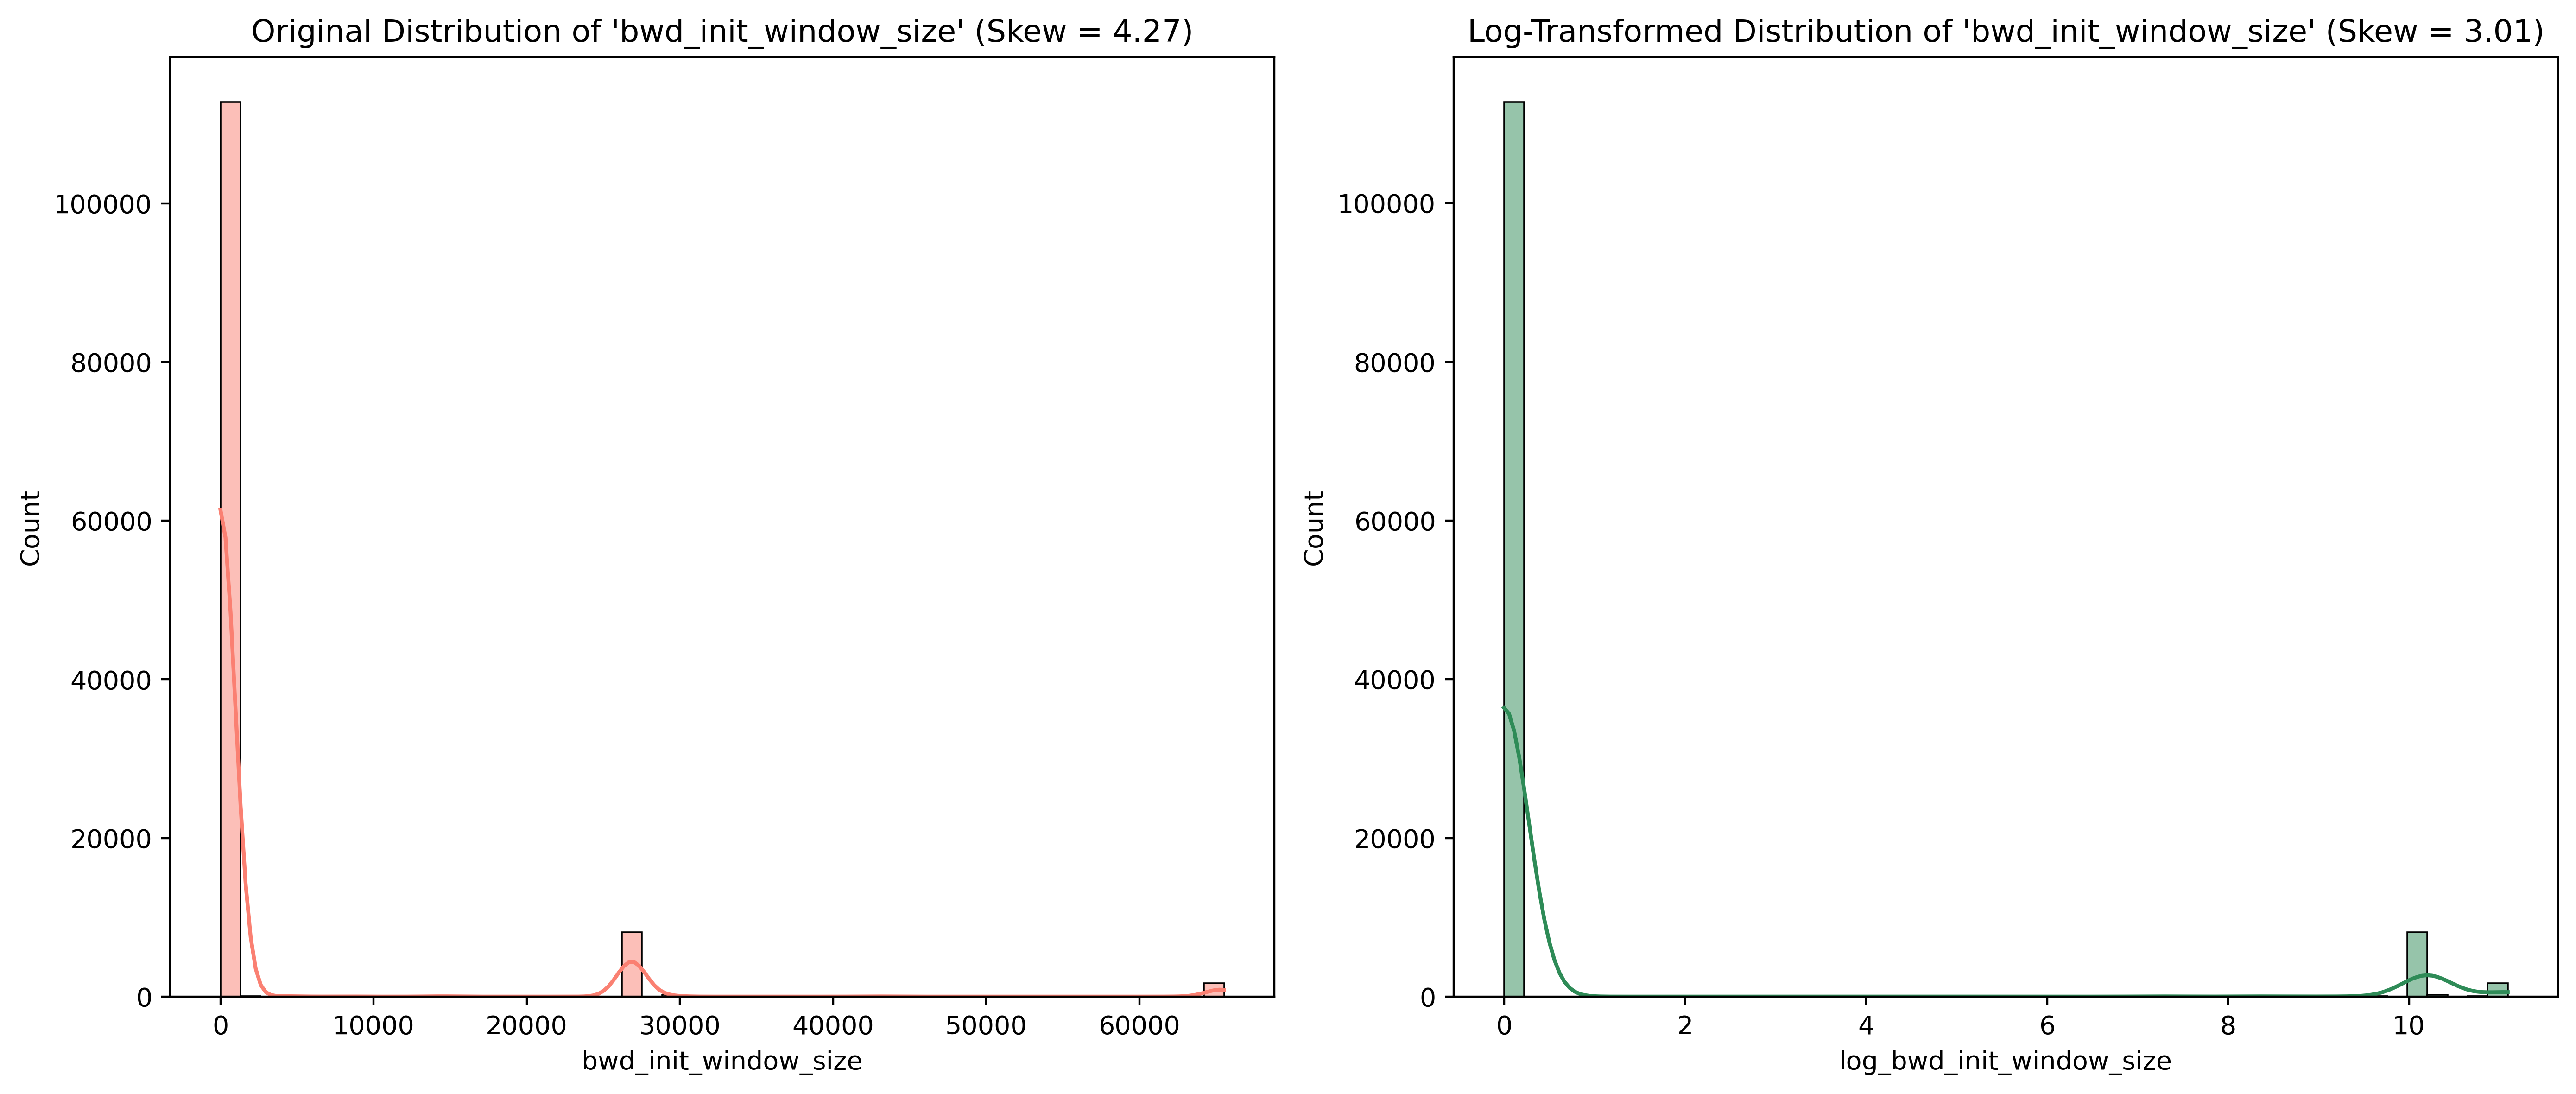

In [517]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Feature to transform
feature = 'bwd_init_window_size'

# Apply log transformation (adding 1 to avoid log(0))
df['log_' + feature] = np.log1p(df[feature])

# Plot original and transformed distributions side by side
plt.figure(figsize=(14, 6),dpi=400)

# Original
plt.subplot(1, 2, 1)
sns.histplot(df[feature], bins=50, kde=True, color='salmon')
plt.title(f"Original Distribution of '{feature}' (Skew = {df[feature].skew():.2f})")
plt.xlabel(feature)

# Transformed
plt.subplot(1, 2, 2)
sns.histplot(df['log_' + feature], bins=50, kde=True, color='seagreen')
plt.title(f"Log-Transformed Distribution of '{feature}' (Skew = {df['log_' + feature].skew():.2f})")
plt.xlabel('log_' + feature)

plt.tight_layout()
plt.show()


In [392]:
numerical_cols = numerical_cols.drop(['id.orig_p','id.resp_p'])
df[numerical_cols] = df[numerical_cols].apply(lambda x: np.log(x+1))

In [393]:
df

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt       3.496859      2.302585   
1           51143       1883   tcp    mqtt       3.492974      2.302585   
2           44761       1883   tcp    mqtt       3.500260      2.302585   
3           60893       1883   tcp    mqtt       3.495327      2.302585   
4           51087       1883   tcp    mqtt       3.493544      2.302585   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -       0.000006      0.693147   
123113      59247      64623   tcp       -       0.000007      0.693147   
123114      59247      64680   tcp       -       0.000006      0.693147   
123115      59247      65000   tcp       -       0.000006      0.693147   
123116      59247      65129   tcp       -       0.000006      0.693147   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0           1.791759           1.386294           1.386294          0.247757   
1           1.791759           1.386294           1.386294          0.248637   
2           1.791759           1.386294           1.386294          0.246988   
3           1.791759           1.386294           1.386294          0.248104   
4           1.791759           1.386294           1.386294          0.248508   
...              ...                ...                ...               ...   
123112      0.693147           0.000000           0.000000         12.030368   
123113      0.693147           0.000000           0.000000         11.881949   
123114      0.693147           0.000000           0.000000         12.030368   
123115      0.693147           0.000000           0.000000         12.030368   
123116      0.693147           0.000000           0.000000         12.030368   

        ...  active.std   idle.min   idle.max   idle.tot   idle.avg  idle.std  \
0       ...         0.0  17.207640  17.207640  17.207640  17.207640       0.0   
1       ...         0.0  17.211872  17.211872  17.211872  17.211872       0.0   
2       ...         0.0  17.211432  17.211432  17.211432  17.211432       0.0   
3       ...         0.0  17.213830  17.213830  17.213830  17.213830       0.0   
4       ...         0.0  17.210512  17.210512  17.210512  17.210512       0.0   
...     ...         ...        ...        ...        ...        ...       ...   
123112  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123113  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123114  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123115  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   
123116  ...         0.0   0.000000   0.000000   0.000000   0.000000       0.0   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0                  11.070397             10.197947              6.220590   
1                  11.070397             10.197947              6.220590   
2                  11.070397             10.197947              6.220590   
3                  11.070397             10.197947              6.220590   
4                  11.070397             10.197947              6.220590   
...                      ...                   ...                   ...   
123112              6.932448              0.000000              6.932448   
123113              6.932448              0.000000              6.932448   
123114              6.932448              0.000000              6.932448   
123115              6.932448              0.000000              6.932448   
123116              6.932448              0.000000              6.932448   

                Attack_Type  
0              MQTT_Publish  
1              MQTT_Publish  
2              MQTT_Publish  
3              MQTT_Publish  
4              MQTT_Publish  
...                     ...  
123112  NMAP_XMAS_TREE_SCAN  
123113  NMAP_XMAS_TR

### (3) Scaled the data using StandardScaler

In [395]:
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = scaled_columns

### (4) Investigating unique values in columns and dropping columns that do not have any significant information

In [397]:
for col in df.columns:
    if len(df[col].unique()) <=1:
        print(f"Column has no unique values: {col}")

Column has no unique values: bwd_URG_flag_count


In [398]:
df = df.drop(columns=['bwd_URG_flag_count'])

In [399]:
df

id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0           38667       1883   tcp    mqtt       4.072723      2.784643   
1           51143       1883   tcp    mqtt       4.067917      2.784643   
2           44761       1883   tcp    mqtt       4.076929      2.784643   
3           60893       1883   tcp    mqtt       4.070828      2.784643   
4           51087       1883   tcp    mqtt       4.068623      2.784643   
...           ...        ...   ...     ...            ...           ...   
123112      59247      63331   tcp       -      -0.252846     -0.341224   
123113      59247      64623   tcp       -      -0.252844     -0.341224   
123114      59247      64680   tcp       -      -0.252846     -0.341224   
123115      59247      65000   tcp       -      -0.252846     -0.341224   
123116      59247      65129   tcp       -      -0.252846     -0.341224   

        bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0           1.981304           1.928219           2.241635         -1.797501   
1           1.981304           1.928219           2.241635         -1.797333   
2           1.981304           1.928219           2.241635         -1.797647   
3           1.981304           1.928219           2.241635         -1.797435   
4           1.981304           1.928219           2.241635         -1.797358   
...              ...                ...                ...               ...   
123112     -0.116714          -2.240597          -0.364841          0.444836   
123113     -0.116714          -2.240597          -0.364841          0.416591   
123114     -0.116714          -2.240597          -0.364841          0.444836   
123115     -0.116714          -2.240597          -0.364841          0.444836   
123116     -0.116714          -2.240597          -0.364841          0.444836   

        ...  active.std  idle.min  idle.max  idle.tot  idle.avg  idle.std  \
0       ...   -0.116308  4.563362  4.541744  4.479901  4.548741 -0.090328   
1       ...   -0.116308  4.564539  4.542915  4.481057  4.549914 -0.090328   
2       ...   -0.116308  4.564416  4.542793  4.480937  4.549792 -0.090328   
3       ...   -0.116308  4.565083  4.543457  4.481592  4.550456 -0.090328   
4       ...   -0.116308  4.564161  4.542539  4.480686  4.549537 -0.090328   
...     ...         ...       ...       ...       ...       ...       ...   
123112  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123113  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123114  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123115  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   
123116  ...   -0.116308 -0.220016 -0.220051 -0.219978 -0.220046 -0.090328   

        fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0                   2.596005              3.264927              1.277204   
1                   2.596005              3.264927              1.277204   
2                   2.596005              3.264927              1.277204   
3                   2.596005              3.264927              1.277204   
4                   2.596005              3.264927              1.277204   
...                      ...                   ...                   ...   
123112              0.964484             -0.302582              1.685863   
123113              0.964484             -0.302582              1.685863   
123114              0.964484             -0.302582              1.685863   
123115              0.964484             -0.302582              1.685863   
123116              0.964484             -0.302582              1.685863   

                Attack_Type  
0              MQTT_Publish  
1              MQTT_Publish  
2              MQTT_Publish  
3              MQTT_Publish  
4              MQTT_Publish  
...                     ...  
123112  NMAP_XMAS_TREE_SCAN  
123113  NMAP_XMAS_TREE_SCAN  
123114  NMAP_XMAS_TREE_SCAN  
123115  

### Top 5 frequent Attack types

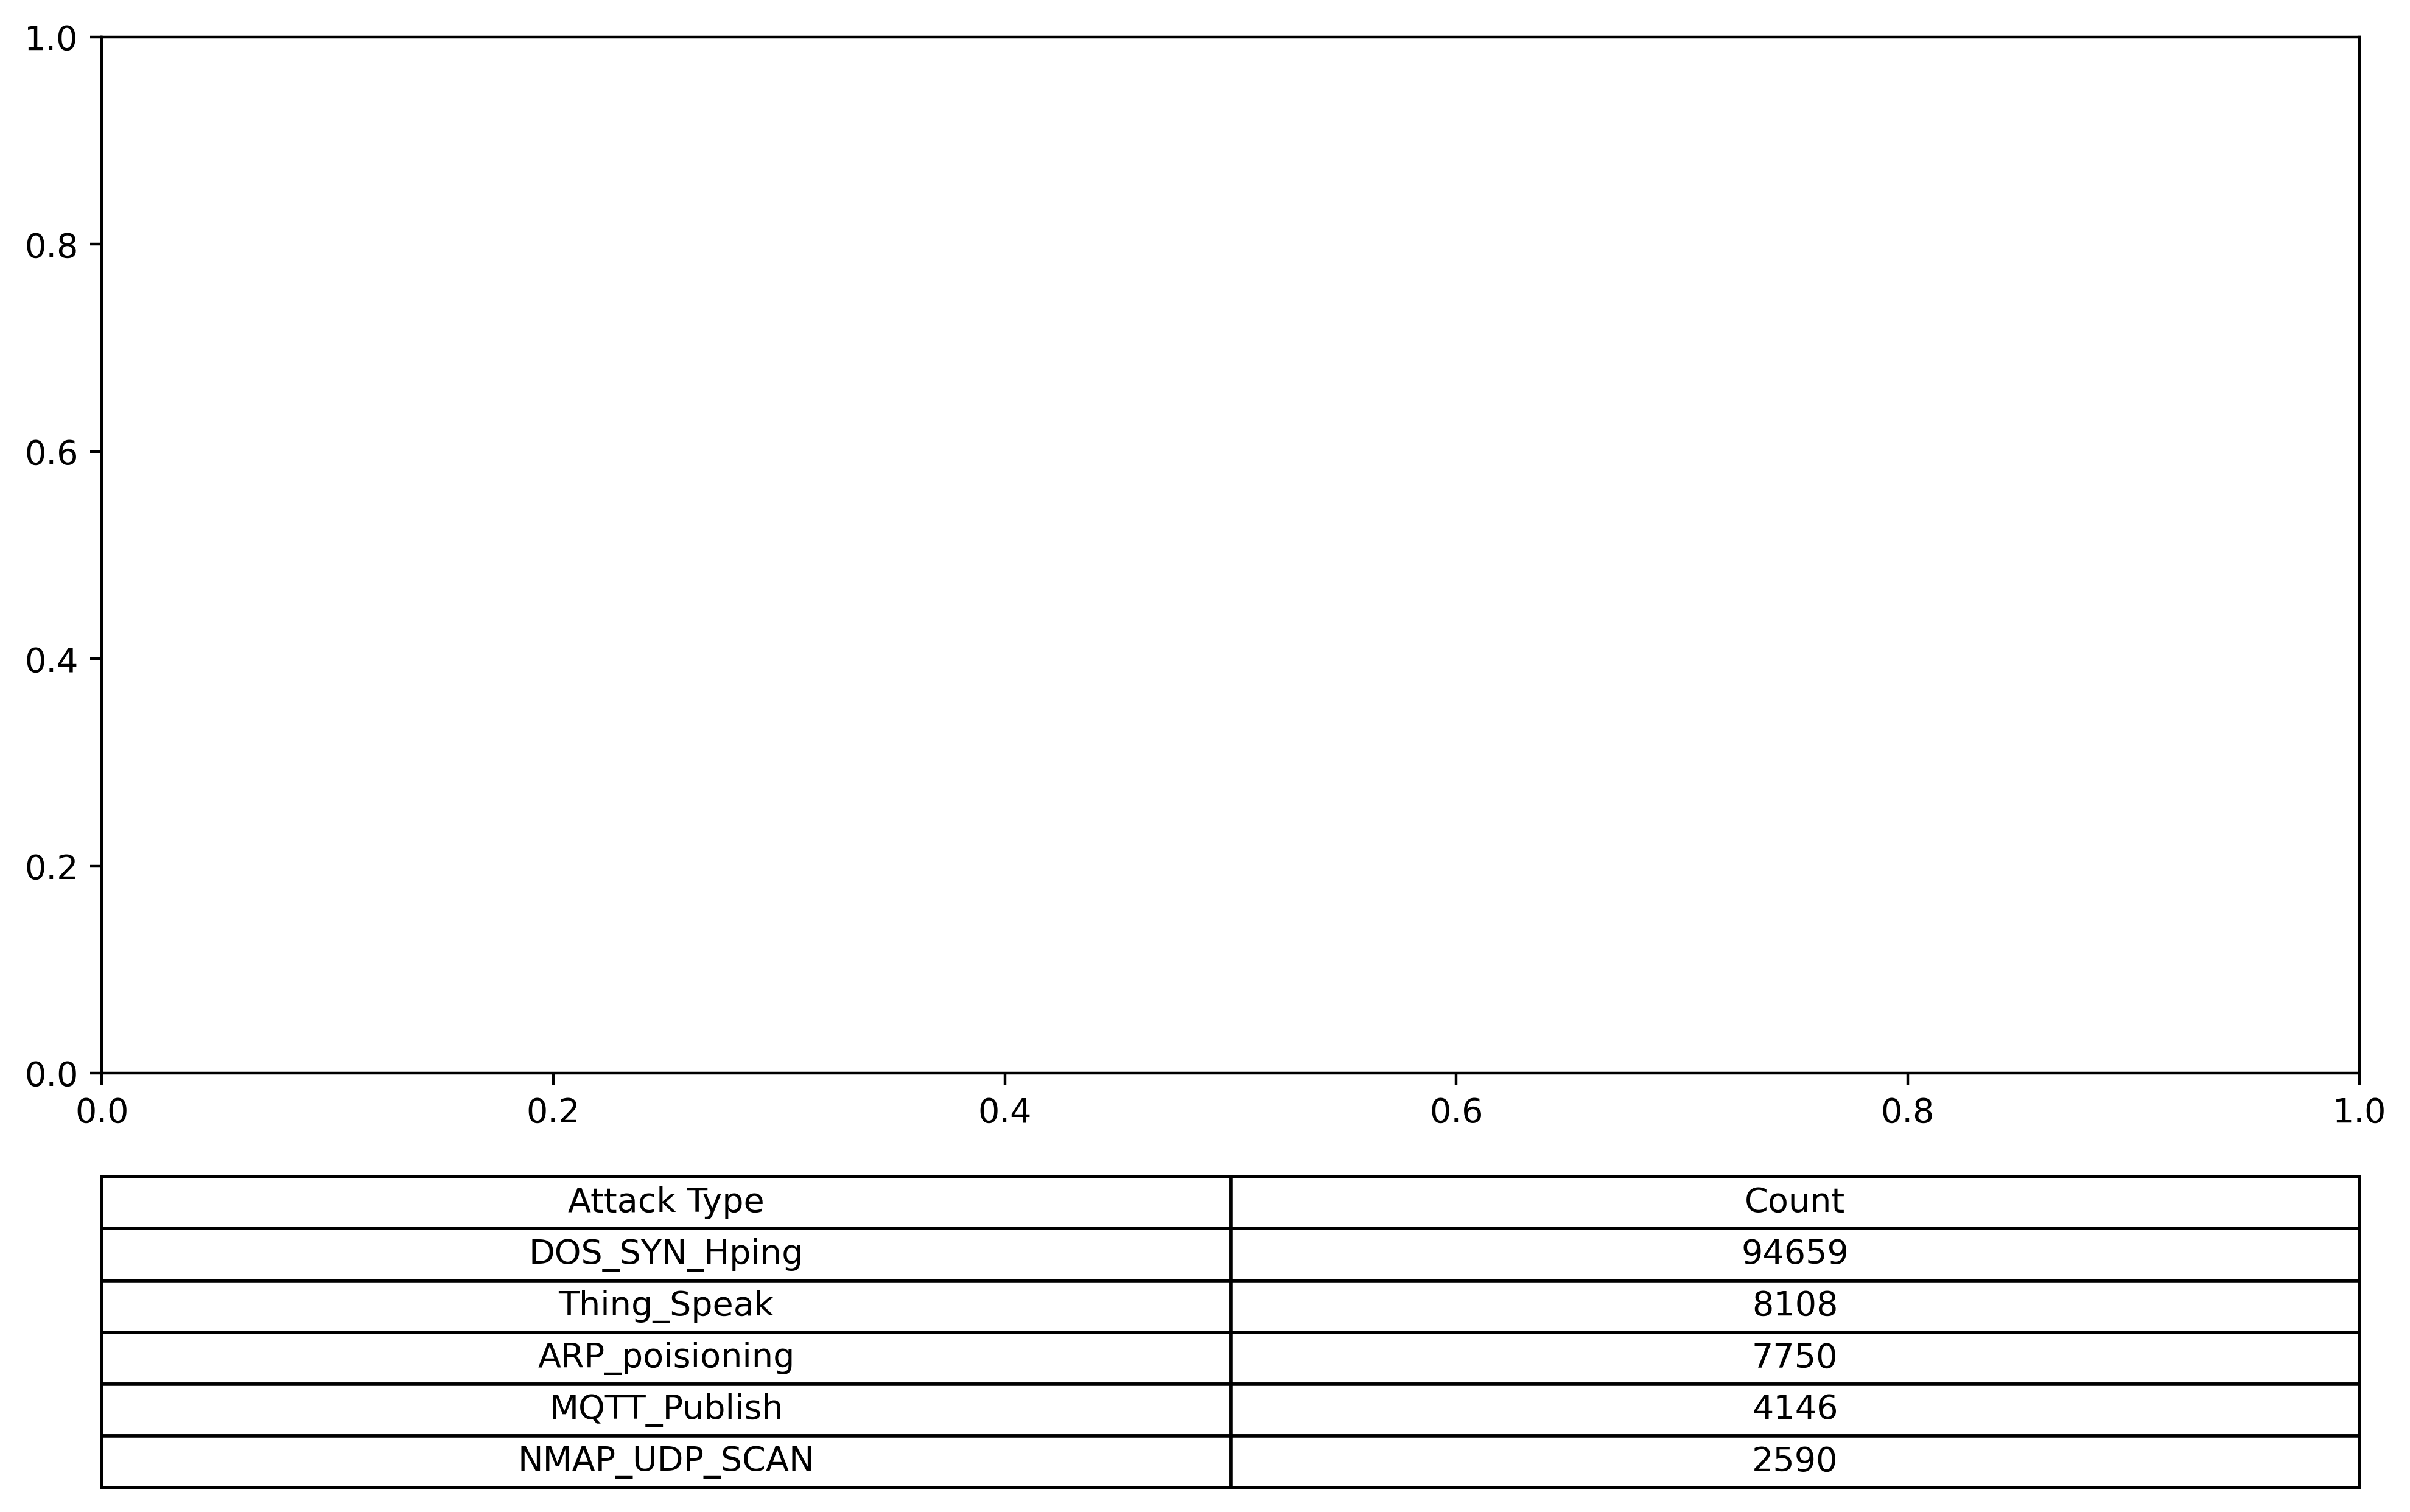

In [447]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming attack_counts is already defined as:
# attack_counts = y.groupby('Attack_type').size().sort_values(ascending=False).head(5)

num_colors = len(attack_counts)
colors = plt.cm.tab20(np.linspace(0, 1, num_colors))

fig, ax = plt.subplots(figsize=(10, 6), dpi=400)

# Plot bar chart
# bars = ax.bar(attack_counts.index, attack_counts.values, color=colors)
# ax.set_title('Attack Type Distribution')
# ax.set_xlabel('Attack Type')
# ax.set_ylabel('Count')
# ax.set_xticks(np.arange(len(attack_counts)))
# ax.set_xticklabels(attack_counts.index, rotation=45, ha='right')
# ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Add table below
table_data = [[attack_type, count] for attack_type, count in zip(attack_counts.index, attack_counts.values)]
table = plt.table(cellText=table_data,
                  colLabels=['Attack Type', 'Count'],
                  cellLoc='center',
                  colLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1, 0.3])  # Adjust bbox as needed

plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()


### Basic EDA on categorical features

In [216]:
X.groupby('proto').size()

proto
icmp        57
tcp     110427
udp      12633
dtype: int64

In [ ]:
X.groupby('service').size()

In [ ]:
X.groupby(['proto','service']).size()

In [ ]:
df.groupby(['service','Attack_Type']).size()

In [ ]:
df = X.copy()
df['Attack_Type'] = y

# attack_type proto grouped
grouped_df = df.groupby(['proto', 'Attack_Type']).size().reset_index(name='count')

# make it a matrix
pivot_df = grouped_df.pivot(index='Attack_Type', columns='proto', values='count').fillna(0)

# attacks for each rotocol
total_attacks_per_protocol = pivot_df.sum(axis=0) 

# get percentage
grouped_df_normalized = pivot_df.div(total_attacks_per_protocol, axis=1) * 100

# create heatmaps for each protocol separately
for protocol in grouped_df_normalized.columns:
    filtered_data = grouped_df_normalized[[protocol]].loc[grouped_df_normalized[protocol] > 0]  # Keep non-zero %

    total_attacks = total_attacks_per_protocol[protocol]

    if not filtered_data.empty:
        plt.figure(figsize=(6, len(filtered_data) * 0.5),dpi=400)
        sns.heatmap(filtered_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='gray',
                    vmin=0, vmax=100, cbar=False)
        plt.title(f"Proportion of Attack Types for {protocol} (%)\nTotal Attacks: {int(total_attacks)}", fontsize=14)
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


## Multicollinearity

In [ ]:
def correlation(data, sig):
    df_cor = data.copy()
    # Encode object columns to numeric
    df_cor = df_cor.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)
    
    # Compute correlation
    corr = df_cor.corr()
    
    # Remove lower triangle & diagonal
    corr.values[np.tril_indices_from(corr, k=0)] = np.nan
    
    # Reshape
    corrmatrix = corr.stack().reset_index()
    corrmatrix.columns = ['X1', 'X2', 'Correlation']
    corrmatrix = corrmatrix[corrmatrix['X1'] != corrmatrix['X2']]
    # Filter significant correlations
    corr_filtered = corrmatrix[corrmatrix['Correlation'].abs() > sig].sort_values(by='Correlation', ascending=False)
    
    # Pivot to wide format for heatmap
    numericalCor = corr_filtered.pivot(index='X1', columns='X2', values='Correlation')
    
    # Plot heatmap
    plt.figure(figsize=(20,10), dpi=400)
    sns.heatmap(numericalCor, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
correlation(df,0.9)

### (5) Feature Engineering

### Target handling and class imbalance

In [403]:
y = rt_iot2022.data.targets 


In [404]:
from collections import Counter
Counter(y['Attack_type'])

Counter({'DOS_SYN_Hping': 94659,
         'Thing_Speak': 8108,
         'ARP_poisioning': 7750,
         'MQTT_Publish': 4146,
         'NMAP_UDP_SCAN': 2590,
         'NMAP_XMAS_TREE_SCAN': 2010,
         'NMAP_OS_DETECTION': 2000,
         'NMAP_TCP_scan': 1002,
         'DDOS_Slowloris': 534,
         'Wipro_bulb': 253,
         'Metasploit_Brute_Force_SSH': 37,
         'NMAP_FIN_SCAN': 28})

### Encode categorical features

In [406]:
categorical_col = df.select_dtypes(include=['object','category']).columns
categorical_col

Index(['proto', 'service', 'Attack_Type'], dtype='object')

In [407]:
df_encoded = pd.get_dummies(df[['proto','service']], drop_first=True)
no_category_df = df.drop(columns=['proto','service'])

In [408]:
df_final = pd.concat([no_category_df, df_encoded], axis=1)

In [409]:
df_final = pd.concat([df_final, y], axis=1)

In [410]:
df_final

id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0           38667       1883       4.072723      2.784643      1.981304   
1           51143       1883       4.067917      2.784643      1.981304   
2           44761       1883       4.076929      2.784643      1.981304   
3           60893       1883       4.070828      2.784643      1.981304   
4           51087       1883       4.068623      2.784643      1.981304   
...           ...        ...            ...           ...           ...   
123112      59247      63331      -0.252846     -0.341224     -0.116714   
123113      59247      64623      -0.252844     -0.341224     -0.116714   
123114      59247      64680      -0.252846     -0.341224     -0.116714   
123115      59247      65000      -0.252846     -0.341224     -0.116714   
123116      59247      65129      -0.252846     -0.341224     -0.116714   

        fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0                1.928219           2.241635         -1.797501   
1                1.928219           2.241635         -1.797333   
2                1.928219           2.241635         -1.797647   
3                1.928219           2.241635         -1.797435   
4                1.928219           2.241635         -1.797358   
...                   ...                ...               ...   
123112          -2.240597          -0.364841          0.444836   
123113          -2.240597          -0.364841          0.416591   
123114          -2.240597          -0.364841          0.444836   
123115          -2.240597          -0.364841          0.444836   
123116          -2.240597          -0.364841          0.444836   

        bwd_pkts_per_sec  flow_pkts_per_sec  ...  service_dhcp  service_dns  \
0              -1.798386          -1.807514  ...         False        False   
1              -1.798283          -1.807291  ...         False        False   
2              -1.798475          -1.807708  ...         False        False   
3              -1.798346          -1.807426  ...         False        False   
4              -1.798299          -1.807323  ...         False        False   
...                  ...                ...  ...           ...          ...   
123112          0.447754           0.449320  ...         False        False   
123113          0.419705           0.422222  ...         False        False   
123114          0.447754           0.449320  ...         False        False   
123115          0.447754           0.449320  ...         False        False   
123116          0.447754           0.449320  ...         False        False   

        service_http  service_irc  service_mqtt  service_ntp  service_radius  \
0              False        False          True        False           False   
1              False        False          True        False           False   
2              False        False          True        False           False   
3              False        False          True        False           False   
4              False        False          True        False           False   
...              ...          ...           ...          ...             ...   
123112         False        False         False        False           False   
123113         False        False         False        False           False   
123114         False        False         False        False           False   
123115         False        False         False        False           False   
123116         False        False         False        False           False   

        service_ssh  service_ssl          Attack_type  
0             False        False         MQTT_Publish  
1             False        False         MQTT_Publish  
2             False        False         MQTT_Publish  
3             False        False         MQTT_Publish  
4             False        False         MQTT_Publish  
...             ...          ...                  ...  
123112      

### Class Imbalanace

In [412]:
import pandas as pd

# 1. Separate majority class and all other classes
majority_class = 'DOS_SYN_Hping'

# Get rows of the majority class
df_majority = df_final[df_final['Attack_type'] == majority_class]

# Get rows of all other (minority) classes
df_minority = df_final[df_final['Attack_type'] != majority_class]

# 2. Undersample the majority class by 50%
df_majority_undersampled = df_majority.sample(frac=0.5, random_state=42)

# 3. Combine undersampled majority with all minority class rows
df_final_undersampled = pd.concat([df_minority, df_majority_undersampled], ignore_index=True)

# ✅ Now df_final_undersampled has half of the original DOS_SYN_Hping rows
print("Class distribution after undersampling:")
print(df_final_undersampled['Attack_type'].value_counts())


Class distribution after undersampling:
Attack_type
DOS_SYN_Hping                 47330
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


In [227]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Separate features and target
X = df_final_undersampled.drop(columns=['Attack_type'])
y = df_final_undersampled['Attack_type']

# Double-check it's removed
assert 'Attack_type' not in X.columns

# Encode only non-label features
X_encoded = pd.get_dummies(X)

# Define sampling strategy for SMOTE
minority_targets = ['NMAP_FIN_SCAN', 'Wipro_bulb', 'Metasploit_Brute_Force_SSH', 'DDOS_Slowloris']
current_counts = Counter(y)
sampling_strategy = {
    cls: current_counts[cls] * 35
    for cls in minority_targets
    if cls in current_counts
}

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_smote, y_smote = smote.fit_resample(X_encoded, y)

# Create the final dataframe
df_smote = pd.DataFrame(X_smote, columns=X_encoded.columns)
df_smote['Attack_type'] = y_smote


/var/folders/xq/mk_9dpc14877s8mzs6300hv80000gn/T/ipykernel_1634/2671793020.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_smote['Attack_type'] = y_smote


In [228]:
import re

# Drop columns matching regex pattern
df_cleaned = df_smote.drop(columns=[col for col in df_smote.columns if re.match(r'Attack_Type_', col)])
df_cleaned['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 47330
DDOS_Slowloris                18690
Wipro_bulb                     8855
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
Metasploit_Brute_Force_SSH     1295
NMAP_TCP_scan                  1002
NMAP_FIN_SCAN                   980
Name: count, dtype: int64

In [229]:
df_cleaned.head(5)

id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883       4.072723      2.784643      1.981304   
1      51143       1883       4.067917      2.784643      1.981304   
2      44761       1883       4.076929      2.784643      1.981304   
3      60893       1883       4.070828      2.784643      1.981304   
4      51087       1883       4.068623      2.784643      1.981304   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0           1.928219           2.241635         -1.797501         -1.798386   
1           1.928219           2.241635         -1.797333         -1.798283   
2           1.928219           2.241635         -1.797647         -1.798475   
3           1.928219           2.241635         -1.797435         -1.798346   
4           1.928219           2.241635         -1.797358         -1.798299   

   flow_pkts_per_sec  ...  service_dhcp  service_dns  service_http  \
0          -1.807514  ...         False        False         False   
1          -1.807291  ...         False        False         False   
2          -1.807708  ...         False        False         False   
3          -1.807426  ...         False        False         False   
4          -1.807323  ...         False        False         False   

   service_irc  service_mqtt  service_ntp  service_radius  service_ssh  \
0        False          True        False           False        False   
1        False          True        False           False        False   
2        False          True        False           False        False   
3        False          True        False           False        False   
4        False          True        False           False        False   

   service_ssl   Attack_type  
0        False  MQTT_Publish  
1        False  MQTT_Publish  
2        False  MQTT_Publish  
3        False  MQTT_Publish  
4        False  MQTT_Publish  

[5 rows x 92 columns]

In [413]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from collections import Counter

# feature and target
X = df_cleaned.drop(columns=['Attack_type'])
y = df_cleaned['Attack_type']

# one hot encode target
y_encoded = pd.get_dummies(y)

# normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Stratified train-test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X_scaled, np.argmax(y_encoded.values, axis=1)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train_raw = y.iloc[train_index]
    y_test = y_encoded.iloc[test_index]

# SMOTE
minority_targets = ['NMAP_FIN_SCAN', 'Wipro_bulb', 'Metasploit_Brute_Force_SSH', 'DDOS_Slowloris']
current_counts = Counter(y_train_raw)
sampling_strategy = {
    cls: current_counts[cls] * 35
    for cls in minority_targets if cls in current_counts
}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_raw)


y_train_encoded = pd.get_dummies(y_train_smote)

# # Model and train
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train_smote.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_smote, y_train_encoded,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop],
                    verbose=1)

# evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f}")
print(f"✅ Test Accuracy: {accuracy * 100:.2f}%")

# Classificaiton report
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test.values, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=y_test.columns))


Mutual Information Scores:
 fwd_pkts_payload.max     1.555564
flow_pkts_payload.max    1.541348
fwd_pkts_payload.tot     1.531660
flow_pkts_payload.tot    1.530056
fwd_subflow_bytes        1.518501
                           ...   
fwd_bulk_rate            0.006508
fwd_bulk_packets         0.005213
service_ntp              0.004368
fwd_bulk_bytes           0.004042
service_radius           0.000000
Length: 91, dtype: float64

Top Features to Plot: ['fwd_pkts_payload.max', 'flow_pkts_payload.max', 'fwd_pkts_payload.tot']
Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13983/13983 ━━━━━━━━━━━━━━━━━━━━ 13s 895us/step - accuracy: 0.9760 - loss: 0.0824 - val_accuracy: 0.9789 - val_loss: 0.0995
Epoch 2/50
13983/13983 ━━━━━━━━━━━━━━━━━━━━ 12s 871us/step - accuracy: 0.9958 - loss: 0.0145 - val_accuracy: 0.9865 - val_loss: 0.0625
Epoch 3/50
13983/13983 ━━━━━━━━━━━━━━━━━━━━ 12s 864us/step - accuracy: 0.9966 - loss: 0.0118 - val_accuracy: 0.9866 - val_loss: 0.0557
Epoch 4/50
13983/13983 ━━━━━━━━━━━━━━━━━━━━ 12s 874us/step - accuracy: 0.9967 - loss: 0.0111 - val_accuracy: 0.9887 - val_loss: 0.0524
Epoch 5/50
13983/13983 ━━━━━━━━━━━━━━━━━━━━ 13s 904us/step - accuracy: 0.9972 - loss: 0.0100 - val_accuracy: 0.9896 - val_loss: 0.0475
Epoch 6/50
13983/13983 ━━━━━━━━━━━━━━━━━━━━ 12s 881us/step - accuracy: 0.9973 - loss: 0.0095 - val_accuracy: 0.9895 - val_loss: 0.0460
Epoch 7/50
13983/13983 ━━━━━━━━━━━━━━━━━━━━ 12s 839us/step - accuracy: 0.9973 - loss: 0.0095 - val_accuracy: 0.9914 - val_loss: 0.0388
Epoch 8/50
13983/13983 ━━━━━━━━━━━━━━━━━━━━ 12s 838us/step - accur

In [ ]:
# SAME BUT WITH HYPERPARMETER TUNING
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def create_model(learning_rate=0.001, neurons=128, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model = KerasClassifier(model=create_model, verbose=0, epochs=100, batch_size=32)

# HYPER PARAMETER TUNING
param_grid = {
    'model__learning_rate': [0.01, 0.001, 0.0001],
    'model__neurons': [64, 128, 256],
    'model__dropout_rate': [0.2, 0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [50]  
}

#  GRID SEARCH WITH EARLY STOPPING
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    n_jobs=-1,
                    cv=3,
                    scoring='accuracy',
                    verbose=1)

grid_result = grid.fit(X_train, y_train, callbacks=[early_stop])

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


In [519]:
# NEURAL NETWORK MODEL
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor = 'val_loss', 
                           patience=5, 
                           restore_best_weights=True
                          )
# TRAINING
history = model.fit(X_train, y_train, epochs=100, batch_size=64, callbacks=[early_stop],verbose=1 ,validation_data=(X_test, y_test))

# EVALUATION
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest loss: {loss}")
print(f"Test accuracy: {accuracy * 100:.2f}%")

# PREDICTIONS
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# CLASSIFICATION
print("\nClassification Report:")
print(classification_report(np.argmax(y_test.values, axis=1), y_pred_classes))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9069 - loss: 0.3347 - val_accuracy: 0.9865 - val_loss: 0.0490
Epoch 2/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.9866 - loss: 0.0482 - val_accuracy: 0.9903 - val_loss: 0.0363
Epoch 3/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9889 - loss: 0.0388 - val_accuracy: 0.9904 - val_loss: 0.0332
Epoch 4/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.9901 - loss: 0.0336 - val_accuracy: 0.9920 - val_loss: 0.0290
Epoch 5/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.9907 - loss: 0.0320 - val_accuracy: 0.9918 - val_loss: 0.0294
Epoch 6/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - accuracy: 0.9915 - loss: 0.0277 - val_accuracy: 0.9916 - val_loss: 0.0282
Epoch 7/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - accuracy: 0.9920 - loss: 0.0259 - val_accuracy: 0.9922 - val_loss: 0.0252
Epoch 8/100
1310/1310 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.99

In [521]:
# PARAMETERS OF THE MODEL
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 256)            │        23,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,342 (477.90 KB)

 Trainable params: 40,780 (159.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,562 (318.61 KB)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each class separately
for label in y.unique():
    idx = y == label
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], label=label, alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA of Network Traffic')
ax.legend()
plt.show()


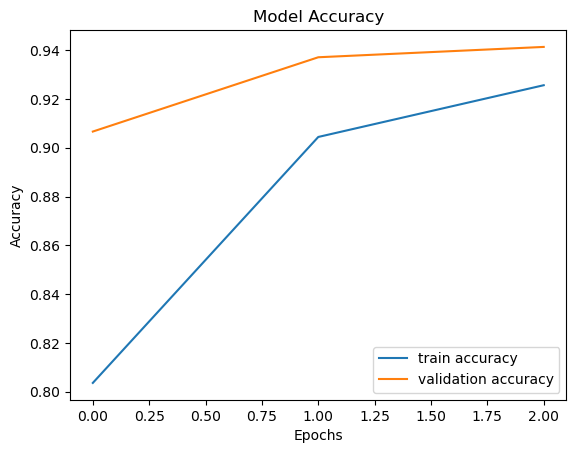

In [311]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
